# 📊 Notebook 2: Exploratory Data Analysis (EDA)

**Project:** Telco Customer Churn Analysis  
**Goal:** Visualize relationships between features and churn to generate hypotheses.

---

## 1. Imports & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

# Load processed data from Notebook 1
df = pd.read_csv('../data/processed/telco_churn_cleaned.csv')
print(f"Data loaded: {df.shape}")

Data loaded: (7043, 22)


## 2. Bivariate Analysis: Categorical Features vs Churn
We'll look at churn rate across different categories.

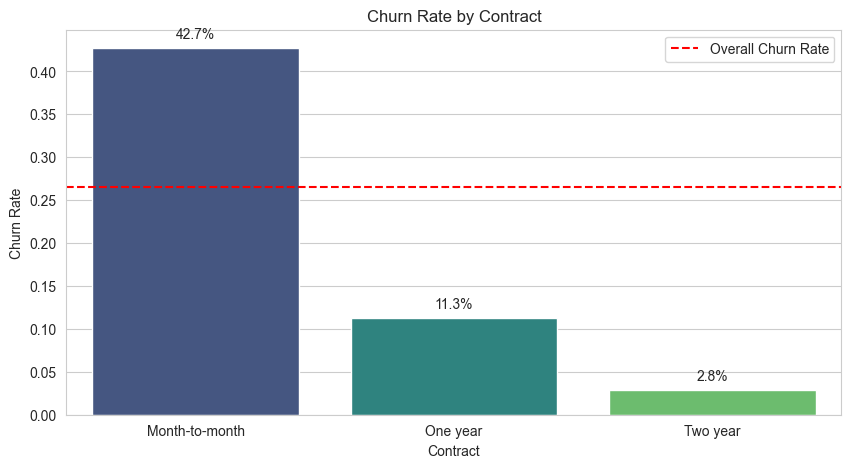

In [2]:
def plot_churn_rate(df, col):
    plt.figure(figsize=(10, 5))
    # Calculate churn rate by category
    churn_rate = df.groupby(col)['Churn_Numeric'].mean().sort_values(ascending=False)
    
    # Plot
    ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.axhline(df['Churn_Numeric'].mean(), color='red', linestyle='--', label='Overall Churn Rate')
    plt.legend()
    
    # Add labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()

# Contract Type
plot_churn_rate(df, 'Contract')

**Insight:** Month-to-month contracts have a **42.7%** churn rate, vastly higher than 1-year (11.3%) or 2-year (2.8%). This is a massive driver.

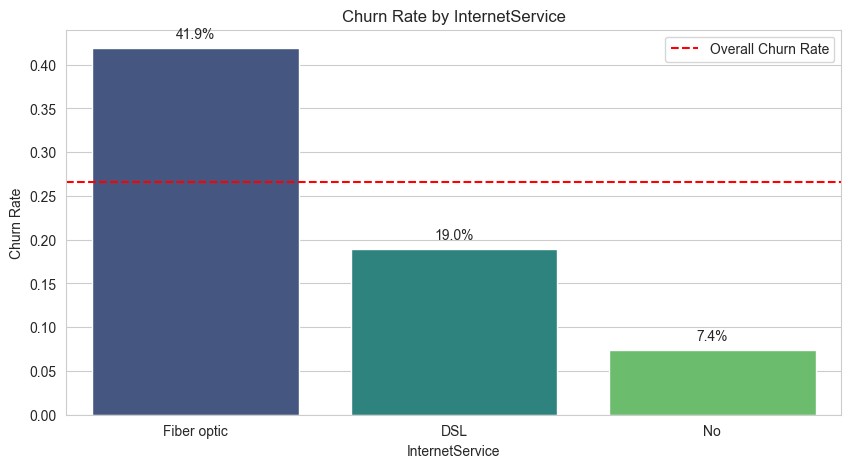

In [3]:
# Internet Service
plot_churn_rate(df, 'InternetService')

**Insight:** Fiber optic customers are churning at **41.9%**, much higher than DSL (19.0%). This suggests dissatisfaction with price or service quality for Fiber users.

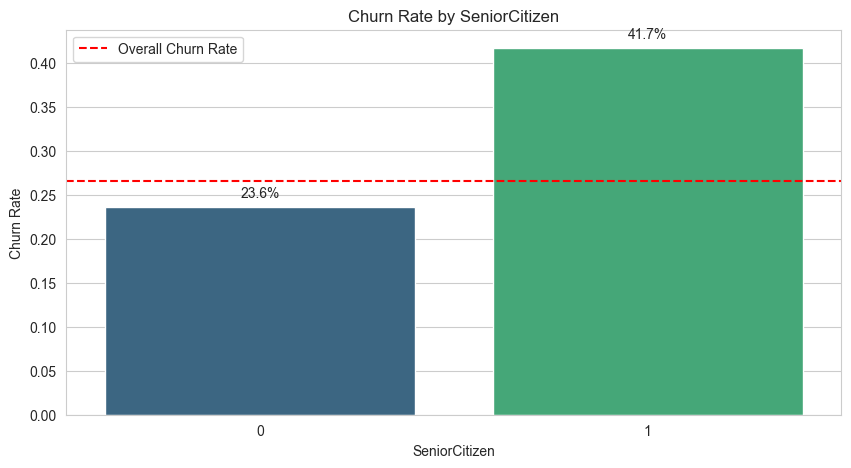

In [4]:
# Senior Citizen Status
plot_churn_rate(df, 'SeniorCitizen')

## 3. Multivariate Analysis
Let's look at interactions. Does Fiber Optic churn depend on Monthly Charges?

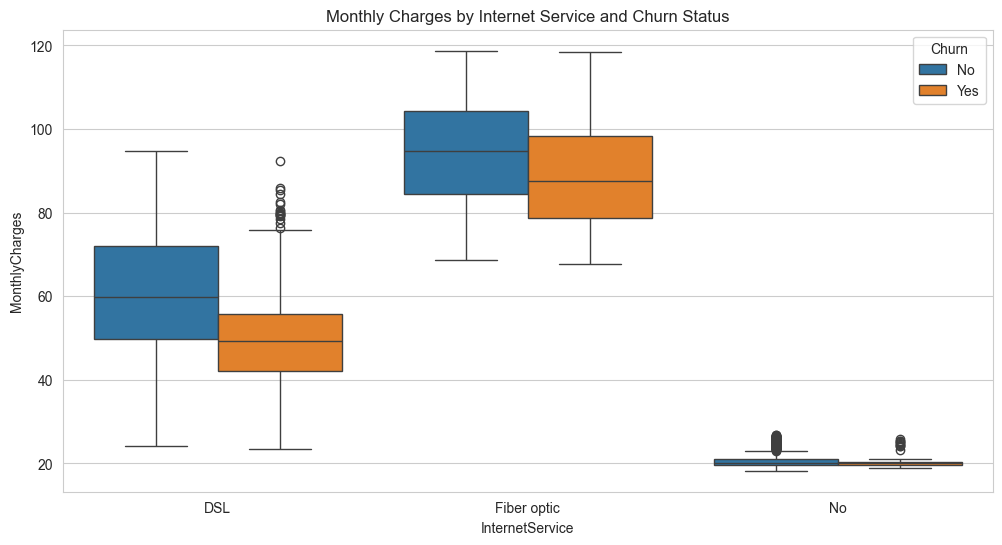

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='InternetService', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges by Internet Service and Churn Status')
plt.show()

**Observe:** 
- Fiber optic is expensive (median ~$90).
- Churned Fiber customers have slightly higher median charges than Retained ones.
- DSL is much cheaper.

## 4. Cohort Analysis: Churn by Tenure
When do customers leave?

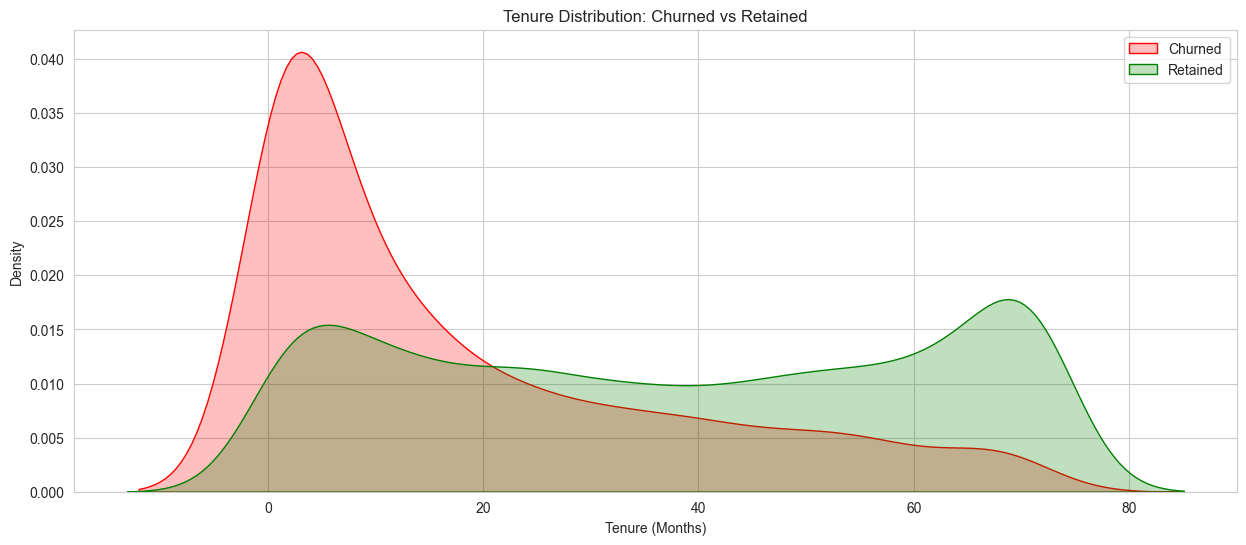

In [6]:
plt.figure(figsize=(15, 6))
sns.kdeplot(df[df['Churn']=='Yes']['tenure'], color='red', shade=True, label='Churned')
sns.kdeplot(df[df['Churn']=='No']['tenure'], color='green', shade=True, label='Retained')
plt.title('Tenure Distribution: Churned vs Retained')
plt.xlabel('Tenure (Months)')
plt.legend()
plt.show()

**Critical Finding:** The red peak is massive at tenure < 12 months. **Calculated risk:** If a customer survives the first year, their probability of churn drops significantly.

## 5. Correlation Heatmap
Quick look at numerical correlations.

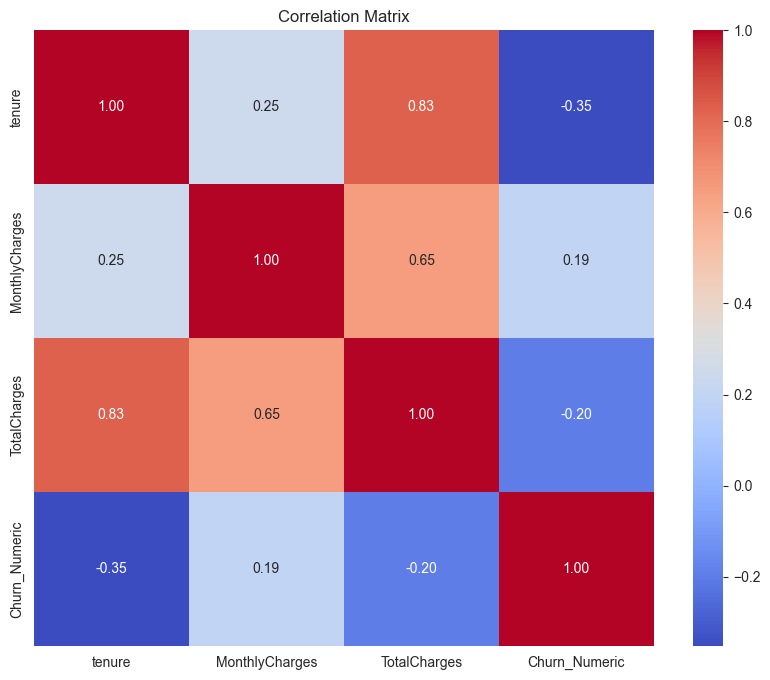

In [7]:
plt.figure(figsize=(10, 8))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Numeric']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Key Correlations:**
- **Churn & Tenure:** Negative correlation (-0.35). Longer tenure = less churn.
- **Churn & MonthlyCharges:** Positive correlation (+0.19). Higher bills = more churn.
- **TotalCharges & Tenure:** Highly correlated (+0.83). Multicollinearity risk for regression models.

## 6. Summary of Hypotheses for Testing

Based on EDA, we will statistically test the following in Notebook 4:

1. **H1:** There is a significant difference in Monthly Charges between churned and retained customers.
2. **H2:** Contract type is statistically dependent on churn (Chi-Square).
3. **H3:** Fiber Optic customers churn at a significantly higher rate than DSL.
4. **H4:** Electronic check users have higher churn rates than other payment methods.